In [190]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:\\Users\\YONSAI\\AppData\\Local\\Programs\\Python\\Python312\\D2Coding-Ver1.3.2-20180524.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

Text(0.5, 0, '1st feature')

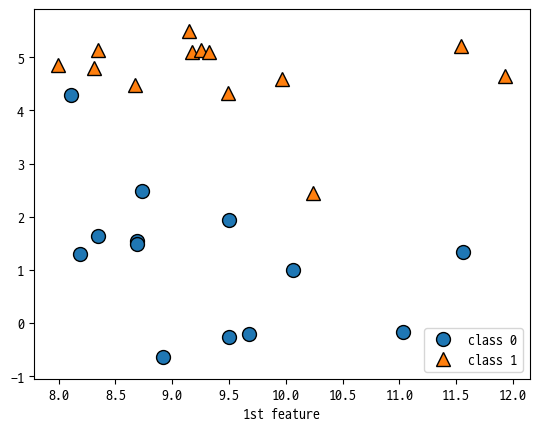

In [191]:
# 데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0","class 1"], loc=4)
plt.xlabel("1st feature")

Text(0, 0.5, 'target')

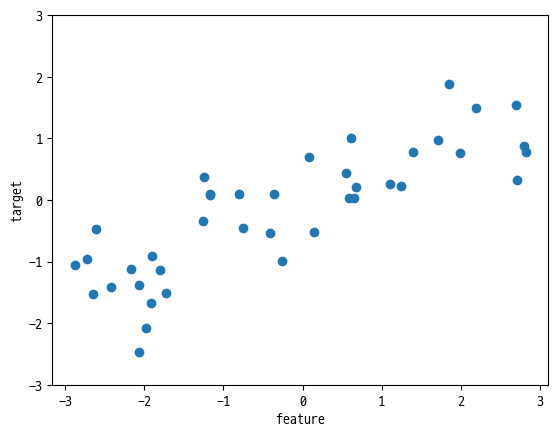

In [192]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [193]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [194]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [195]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [196]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [197]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_6372\1898194097.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


데이터의 형태: (506, 13)


In [198]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [199]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [200]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [201]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


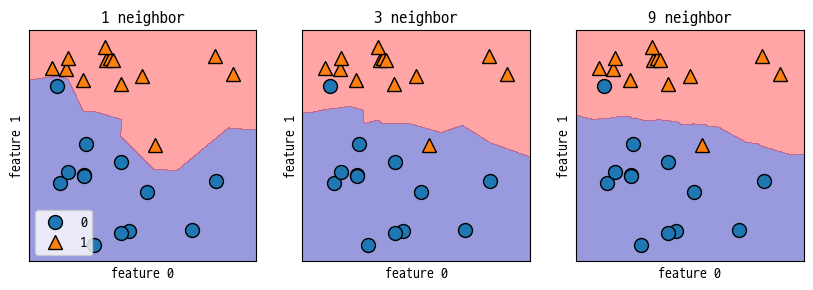

In [202]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fix 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel(("feature 0"))
    ax.set_ylabel(("feature 1"))
axes[0].legend(loc=3)

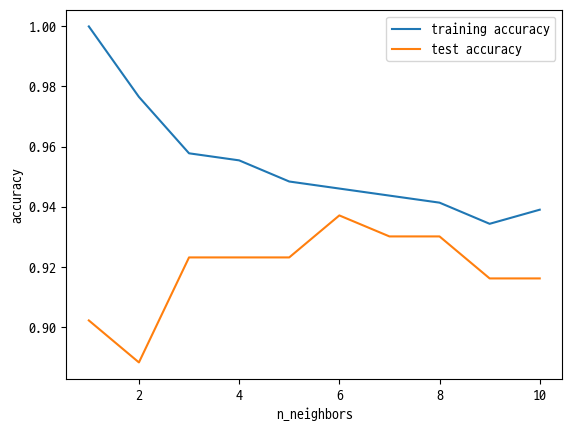

In [203]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지의 n_neighbros 를 적용
n_neighbors_settings = range(1, 11)

for n_neighbors in n_neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(n_neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(n_neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()


In [204]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 갯체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [205]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


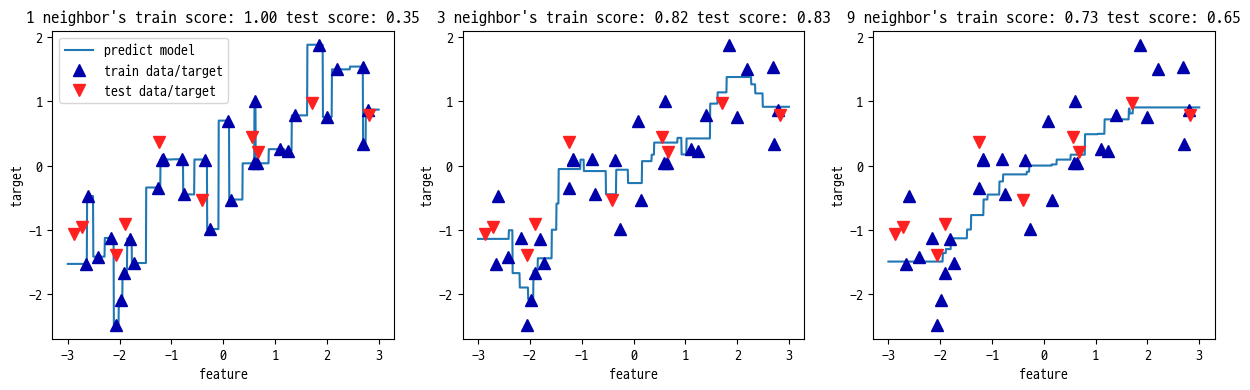

In [206]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fix 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X,y)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbor's train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel(("feature"))
    ax.set_ylabel(("target"))

axes[0].legend(["predict model", "train data/target", "test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


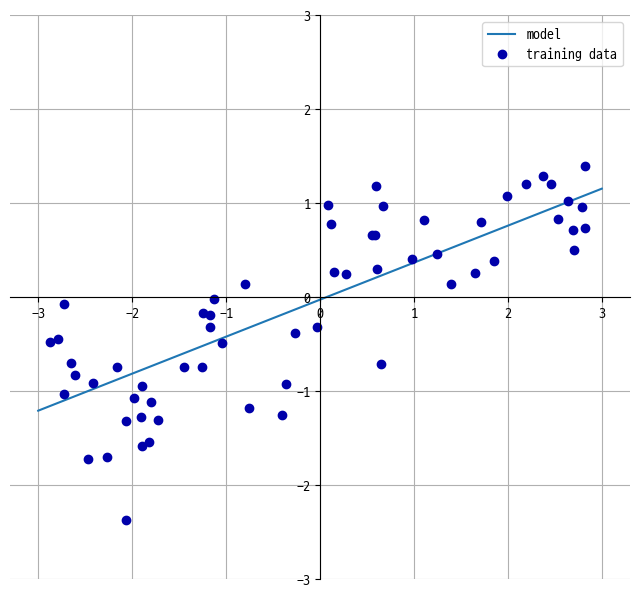

In [207]:
mglearn.plots.plot_linear_regression_wave()

v 선형 회귀(최소제곱법)

In [208]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:",lr.coef_) # 가중치(weight) 또는 계수(coefficient) / NumPy 배열
print("lr.interept_:",lr.intercept_)    # 편향(offset) 또는 절편(intercept) / 실수(float) 값

lr.coef_: [0.39390555]
lr.interept_: -0.031804343026759746


In [209]:
# 데이터가 적을 시 과소적합으로 나옴

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [210]:
# 데이터가 많은 경우 과대적합으로 나옴

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


v 리지 회귀

아래 훈련 / 테스트 점수를 위의 과대적합된 선형 회귀 결과와 비교 시,
선형 보다 훈련 점수는 낮지만, 테스트 점수는 높음.

>> 리지 회귀는 많은 양의 데이터셋에서 모델의 복잡도를 떨어트려(계수를 0에 가깝게 함) 훈련 세트 점수는 낮지만,
   테스트 세트에 대한 점수는 선형 회귀보다 높게 가질 수 있음.

In [211]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [212]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)  

print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [213]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)  

print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


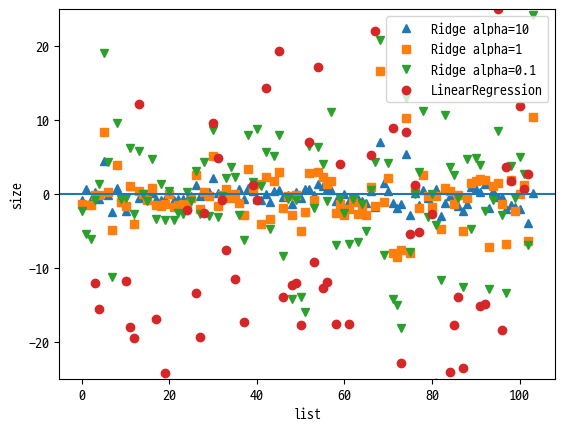

In [214]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel('list')
plt.ylabel("size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

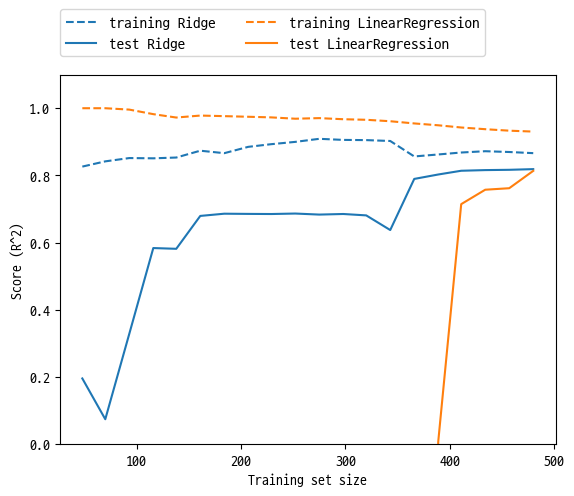

In [215]:
mglearn.plots.plot_ridge_n_samples()

v 라쏘

In [216]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso.coef_!=0))     # 이 부분은 이해가 안됨!

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 4


In [217]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.005, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso001.coef_!=0)) 

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.78
사용한 특성의 개수 43


In [218]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso00001.coef_!=0)) 

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 96


(-25.0, 25.0)

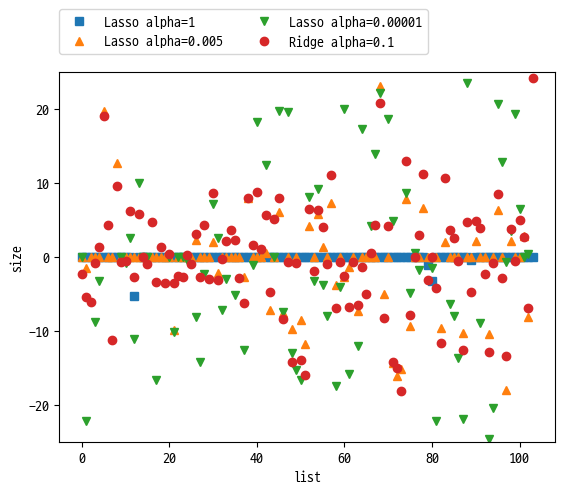

In [219]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.005")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.00001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel('list')
plt.ylabel("size")
plt.ylim(-25, 25)

c:\Users\YONSAI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


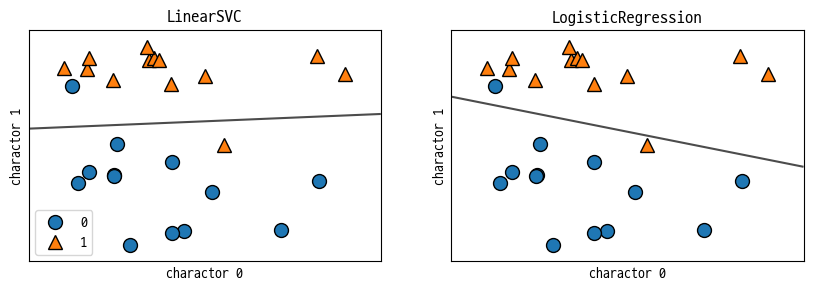

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('charactor 0')
    ax.set_ylabel('charactor 1')
axes[0].legend()

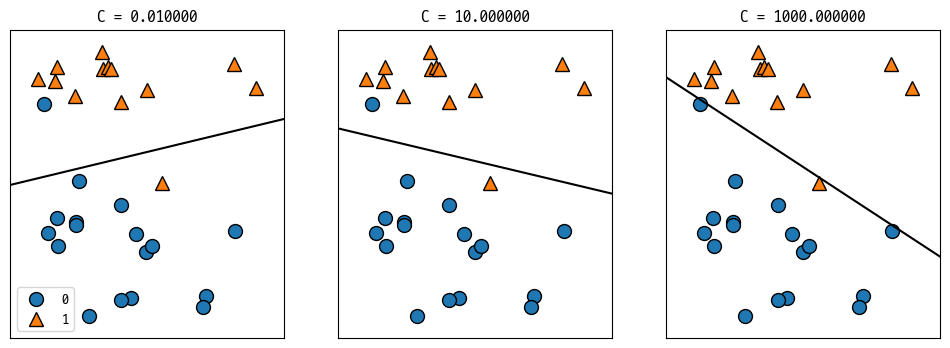

In [221]:
mglearn.plots.plot_linear_svc_regularization()

In [222]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [223]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.981
테스트 세트 점수 : 0.965


In [224]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


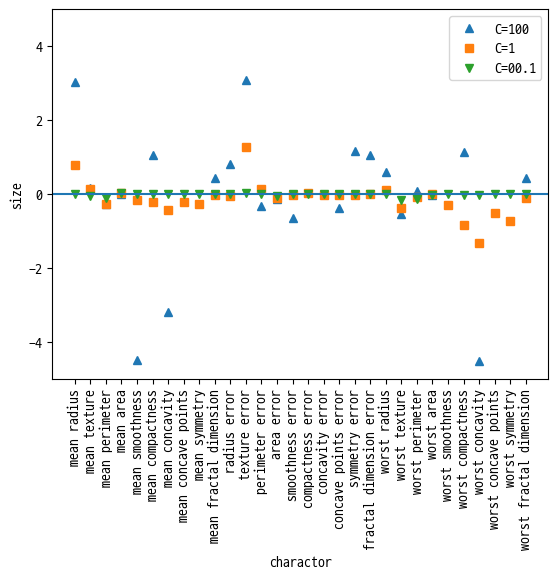

In [225]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 's', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=00.1')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('charactor')
plt.ylabel('size')
plt.legend()

C=0.001000 인 l1 로디스틱 회귀의 훈련 정확도: 0.91
C=0.001000 인 l1 로디스틱 회귀의 테스트 정확도: 0.92
C=1.000000 인 l1 로디스틱 회귀의 훈련 정확도: 0.96
C=1.000000 인 l1 로디스틱 회귀의 테스트 정확도: 0.96
C=100.000000 인 l1 로디스틱 회귀의 훈련 정확도: 0.99
C=100.000000 인 l1 로디스틱 회귀의 테스트 정확도: 0.98


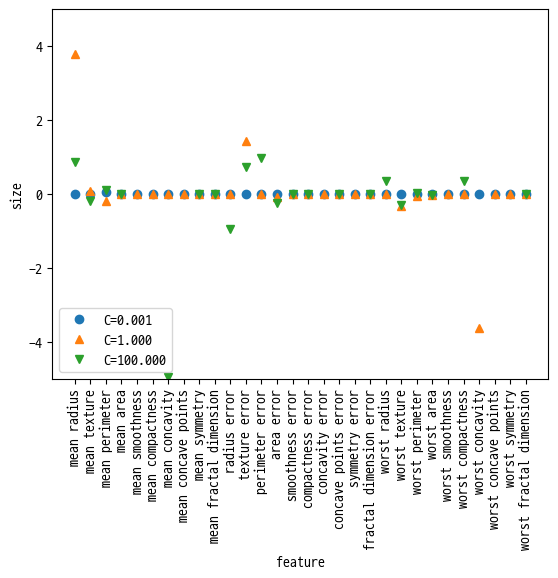

In [226]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:3f} 인 l1 로디스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:3f} 인 l1 로디스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    xlims = plt.xlim()
    plt.xlim(xlims)
    plt.xlabel('feature')
    plt.ylabel('size')

    plt.ylim(-5, 5)
    plt.legend(loc=3)

v 다중 클래스 분류용 선형 모델

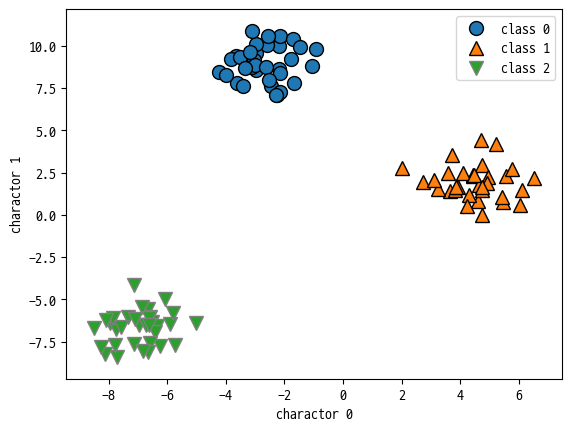

In [227]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('charactor 0')
plt.ylabel('charactor 1')
plt.legend(["class 0", "class 1", "class 2"])

In [228]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


c:\Users\YONSAI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


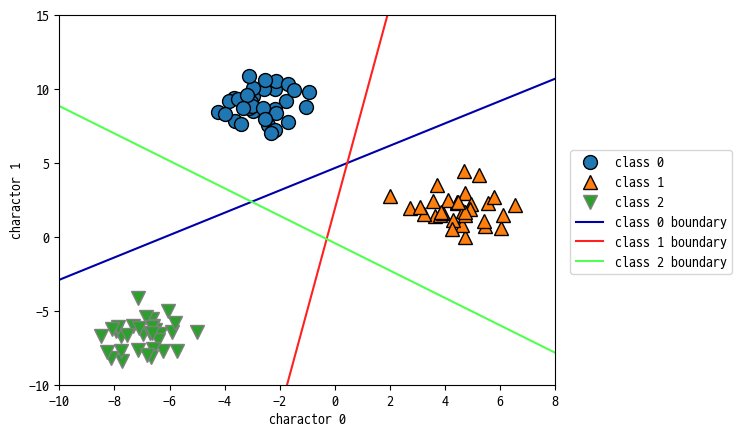

In [229]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('charactor 0')
plt.ylabel('charactor 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.03, 0.3))

Text(0, 0.5, '특성 1')

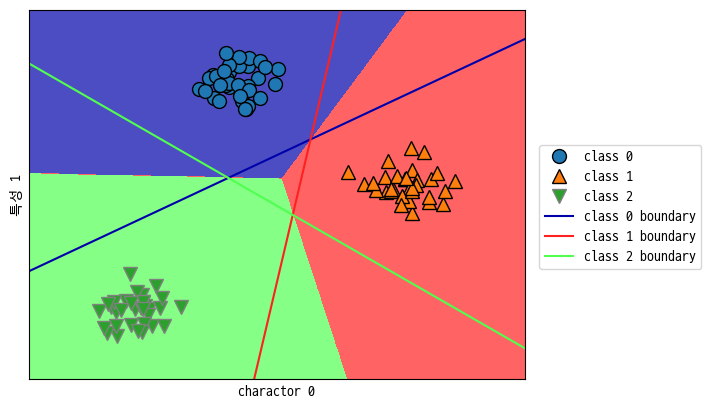

In [230]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.03, 0.3))
plt.xlabel('charactor 0')
plt.ylabel('특성 1')

v 나이브 베이즈 분류기

In [231]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [232]:
counts = {}
for label in np.unique(y):
    # np.unique(x) : 고유한 원소들을 모은 뒤, 1차원 shape으로 변환하고 정렬을 진행한 결과를 반환
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)   # .sum(axis=0) : axis=0는 x축을 기준으로 합을 구하는 방식 (x축 row를 합산)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
